<a href="https://colab.research.google.com/github/Yukixnya/NeuralNetwork/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install protobuf google-pasta

In [ ]:
#neural network

In [ ]:
#checking GPU
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [ ]:
#adding dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()

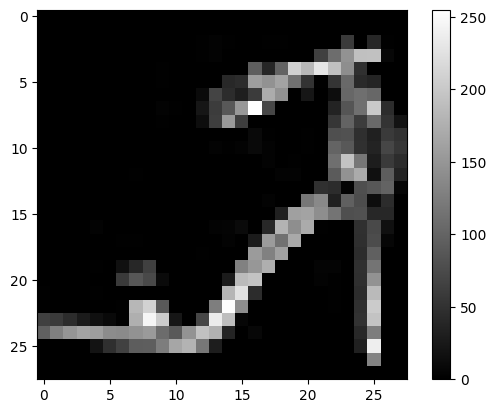

In [ ]:
#data traning
import matplotlib.pyplot as plt
  #item number to study with
data_idx = 8                   #upto 59999
plt.figure()
plt.imshow(train_images[data_idx] ,cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

#flashcard

In [ ]:
#data table
'''     Lable     Description
        0          Tshirt/top
        1          Trouser
        2          Pullover
        3          Dress
        4          Coat
        5          Sandal
        6          Shirt
        7          Sneaker
        8          Bag
        9          Ankle boot
'''

In [ ]:
#answer as index
train_labels[data_idx]

5

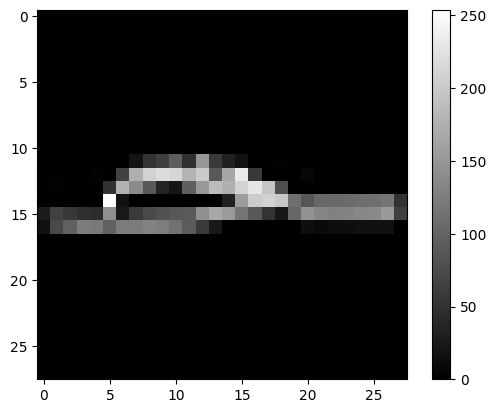

In [ ]:
#data validation
import matplotlib.pyplot as plt
  #item number to quiz with
data_idx = 8        #upto 59999
plt.figure()
plt.imshow(valid_images[data_idx] ,cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
valid_labels[data_idx]

5

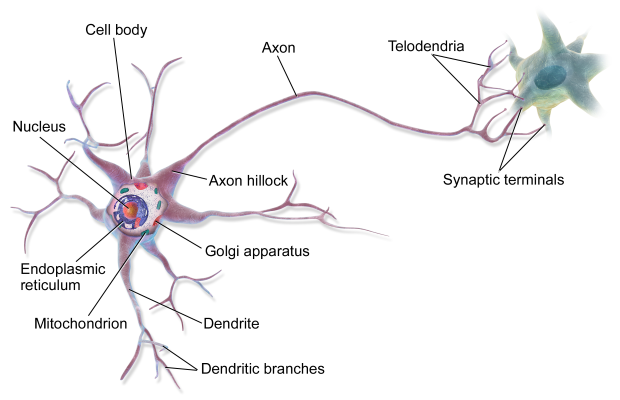

In [ ]:
#neuron building
  #1 Defining the architecture
  #2 Intiating traning
  #3 Evaluating the model

#math behing this
'''
    y = mx + b

    where ,
      x -> information coming through dendrites
      y -> information going out of the treminals(axon)

      (0 to 225)
      m -> weight
      b -> bias

'''

# each image is made up of 28 x 28 pixles so we have 784 weights
# px value with 0 is white and with 225 is black

In [ ]:
#28 list with 28 values each
valid_images[data_idx]

#px data matrix

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  19,  53,  63,  93,  49, 150,
         58,  32,  17,   0,   0,   2,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  1,   1,   0,   0,   3,   0,  66, 174, 209, 219, 213, 179, 202,
         88, 165, 233,  56,   0,   0,   0,   6,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   3,   1,   1,   0,  50, 177, 138,  88,  37,  21,  95, 151,
        187, 175, 210, 229, 196,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 254,  18,   0,   0,   0,   0,   0,   0,
          0,  33, 155, 203, 209, 198, 111,  86, 104, 105, 107, 110, 111,
        116,  50],
       [ 28,  66,  56,  47,  45, 142,  25,  58,  74,  82,  87,  90, 143,
        167, 153, 117,  88,  51,  23, 103, 146, 132, 128, 130, 134, 136,
        152,  63],
       [ 16,  74,  96, 124, 122,  98, 124, 124, 130, 125, 114,  91,  58,
         25,   0,   0,   0,   0,   0,   0,  14,  10,  14,  14,  15,  16,
         16,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
number_of_classes = train_labels.max() + 1
number_of_classes

10

In [ ]:
'''
  Flatten - Converts multidimensional data into 1 dimensional data
            (ex: a list of lists into a single list).
  Dense - A "row" of neurons. Each neuron has a weight (w) for each input.
          In the example below, we use the number 10 to place ten neurons.
'''

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(number_of_classes),
])

In [ ]:
# verifing the model
# to make sure our model has the structure we expect
# use of summary function
model.summary()

# output is 7850 so for each pixel 10 is weight and there are 784

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
image_height = 28
image_width = 28
number_of_weights = image_height * image_width * number_of_classes
number_of_weights

7840

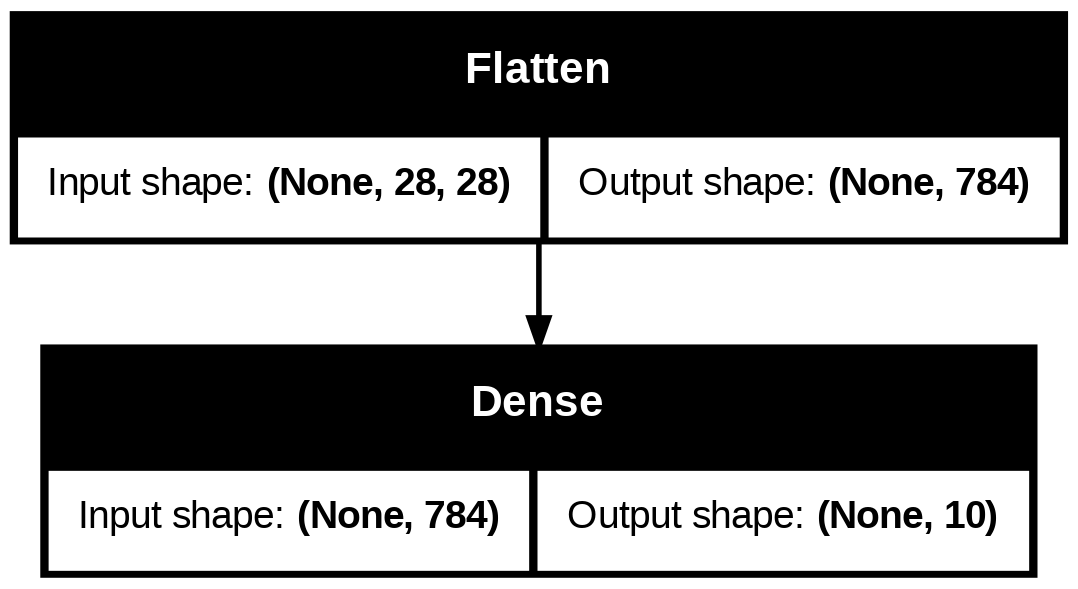

In [ ]:
# 2nd way of verification
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Sparse - how our lable is an integer for our categories
# Categorical - classification
# Crossentropy - more confident on incorrect guess more worse score (100% confident on wrong answer score goes to " -ve infinity ")
# form_logits - linear output transformed to probability to inteprate model's

In [ ]:
# learing analysis
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    validation_data=(valid_images, valid_labels)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6857 - loss: 24.6372 - val_accuracy: 0.7940 - val_loss: 11.7581
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7931 - loss: 11.9483 - val_accuracy: 0.8022 - val_loss: 11.5298
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7978 - loss: 10.9824 - val_accuracy: 0.8141 - val_loss: 10.3392
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8018 - loss: 10.8380 - val_accuracy: 0.7859 - val_loss: 11.4911
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7988 - loss: 10.3557 - val_accuracy: 0.8037 - val_loss: 10.8917


In [ ]:
# predection
model.predict(train_images[0:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[-2.31453705e+02, -6.31458801e+02, -6.61044846e+01,
        -1.75804932e+02, -2.00435120e+02,  3.62931152e+02,
         4.48039742e+01,  3.21684082e+02,  2.57292725e+02,
         6.15444824e+02],
       [ 3.75750122e+02, -1.34700470e+02,  2.62409424e+02,
         1.69716019e+02,  1.49350481e+01, -1.35449915e+03,
         2.73555756e+02, -1.60378833e+03, -9.94349899e+01,
        -9.72894592e+02],
       [ 1.29998169e+02,  8.51542587e+01,  1.05382034e+02,
         1.31249756e+02,  1.09780388e+02, -5.42614624e+02,
         9.01214294e+01, -3.41008972e+02, -4.22696762e+01,
        -2.03320450e+02],
       [ 1.86482727e+02,  1.62251221e+02,  2.12086838e+02,
         2.35315262e+02,  1.10224976e+02, -8.81945190e+02,
         1.67920532e+02, -8.02161133e+02, -9.34860992e+01,
        -7.68621521e+02],
       [ 2.21791321e+02,  2.79482422e+02,  1.67105988e+02,
         2.60520325e+02,  2.03648087e+02, -9.50410522e+02,
         1.41778183e+02, -6.19368408e+02,  5.30592144e-01,
        -7.

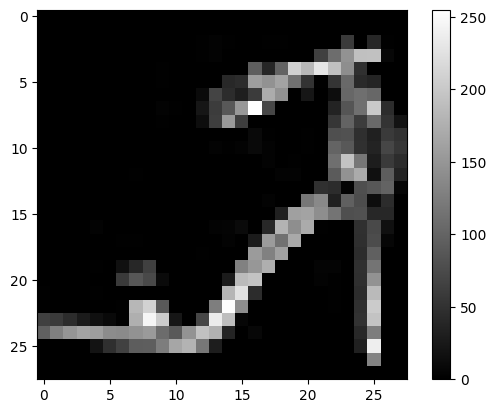

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


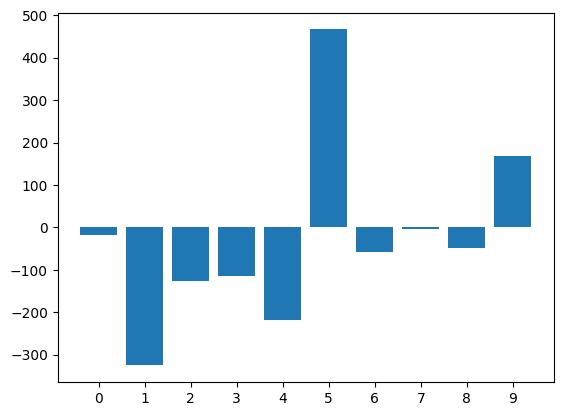

correct answer:  5


In [ ]:
data_idx = 8       #upto 59999
plt.figure()
plt.imshow(train_images[data_idx] ,cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(number_of_classes)
plt.figure()
plt.bar(x_values, model.predict(train_images[data_idx:data_idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print("correct answer: ", train_labels[data_idx])

In [ ]:
# -------------------------------------------------------------------------------------------------------------------------#

Found 20 images belonging to 5 classes.


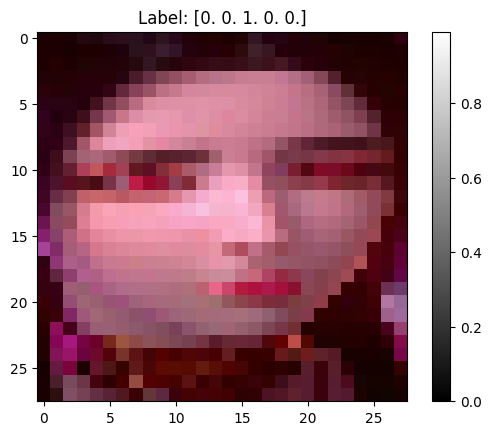

Label: [0. 0. 1. 0. 0.]


In [ ]:
# without names model traning

# Checking GPU
import tensorflow as tf
tf.config.list_physical_devices('GPU')

# Data Loading
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define the path to your dataset
train_data_dir = '/content'  # Update this to your actual dataset path

# Data Augmentation and Loading
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0, validation_split=0.2)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(28, 28),  # Resize images to 28x28 (or your desired size)
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training'  # Set as training data
)

# Get a batch of images and labels
images, labels = next(train_generator)

# Item number to study with
data_idx = 14  # Change this index to visualize different images

# Plotting the image
plt.figure()
plt.imshow(images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.title(f'Label: {labels[data_idx]}')  # Show the label
plt.show()

# Print the corresponding label for the selected image
print("Label:", labels[data_idx])

In [ ]:
# -------------------------------------------------------------------------------------------------------------------------#

Found 20 images belonging to 5 classes.
Class indices: {'.config': 0, '.ipynb_checkpoints': 1, 'cailin': 2, 'liushen': 3, 'sample_data': 4}


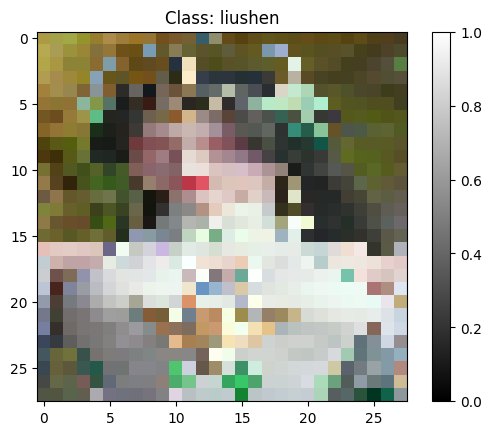

Character: liushen


NameError: name 'model' is not defined

In [ ]:
# with names model traning

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Set up the data generator
data_gen = ImageDataGenerator(rescale=1.0 / 255.0, validation_split=0.2)

# Load training data
train_generator = data_gen.flow_from_directory(
    '/content',       # Path to your main data folder
    target_size=(28, 28),  # Resize images to 28x28 (or your desired input size)
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training'
)

# Display updated class indices
print("Class indices:", train_generator.class_indices)

# Get the class indices mapping
class_indices = train_generator.class_indices
# Create a reverse mapping from indices to class names
index_to_class = {v: k for k, v in class_indices.items()}

# Get a batch of images and labels
images, labels = next(train_generator)

# Select an image to display
data_idx = 1  # Change this index to view different images

# Plot the image
plt.figure()
plt.imshow(images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)

# Get the class name from the label
label_index = labels[data_idx].argmax()  # Get the index of the one-hot encoded label
label_name = index_to_class[label_index]  # Map index to class name
plt.title(f'Class: {label_name}')  # Show the class name as the label
plt.show()

# Print the corresponding label for the selected image
print("Character:", label_name)

model.save('person_recognition_model.keras')
#model = tf.keras.models.load_model('person_recognition_model.keras')

In [ ]:
# List the files and folders in your dataset directory
!ls -a /content
!ls -a

.  ..  cailin  .config	liushen  unknown1.jpeg	unknown2.jpg
.  ..  cailin  .config	liushen  unknown1.jpeg	unknown2.jpg


In [ ]:
# Delete the .ipynb_checkpoints folder in the dataset directory
!rm -rf /content/.ipynb_checkpoints

In [ ]:
!pip install tensorflow

In [ ]:
#checking GPU
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [ ]:
# model traning & validation & prediction

import os
import shutil
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Data Preparation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of data for validation
)

# Load training data
train_generator = datagen.flow_from_directory(
    '/content',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    color_mode='rgb'  # Use RGB images
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    '/content',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    color_mode='rgb'  # Use RGB images
)

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),  # RGB input
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Change this to 2 for the two classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10  # Adjust epochs as necessary
)

# Evaluate the model
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f'Validation loss: {validation_loss}, Validation accuracy: {validation_accuracy}')

# Prediction Function
def predict_person(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(28, 28), color_mode='rgb')  # Match input size and color
    img_array = img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions)

    # Map indices to class names
    class_indices = train_generator.class_indices  # Get this from your training setup
    index_to_class = {v: k for k, v in class_indices.items()}
    predicted_class = index_to_class[predicted_index]

    return predicted_class

def target_image(image_path):
    # Load the image to display
    img = load_img(image_path)  # Load image in original size
    plt.figure(figsize=(4, 4))
    plt.imshow(img)  # Show in original color
    plt.axis('off')  # Turn off axes
    plt.show()

def save_incorrect_prediction(image_path, correct_class):
    class_dir = os.path.join('/content', correct_class)
    os.makedirs(class_dir, exist_ok=True)
    shutil.copy(image_path, class_dir)
    print(f'Image added to {correct_class} class.')

# Use the prediction function
image_path = '/content/unknown2.jpg'  # Change this to your image path
predicted_class = predict_person(image_path)
target_image(image_path)
print(f'The model predicts: {predicted_class}')
predict_person(image_path)

user_feedback = input('Is this prediction correct? (yes/no): ')
if user_feedback.lower() == 'no':
    correct_class = input('Please provide the correct label: ')
    save_incorrect_prediction(image_path, correct_class)

In [ ]:
# -------------------------------------------------------------------------------------------------------------------------#

In [ ]:
# List the files and folders in your dataset directory
!ls -a /content/family



.  ..  jyoti  savita  surendra


In [ ]:
# Delete the .ipynb_checkpoints folder in the dataset directory
!rm -rf /content/family/.ipynb_checkpoints

In [ ]:
# model traning & validation & prediction

import os
import shutil
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Data Preparation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of data for validation
)

# Load training data
train_generator = datagen.flow_from_directory(
    '/content/family',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    color_mode='rgb'  # Use RGB images
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    '/content/family',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    color_mode='rgb'  # Use RGB images
)

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # Adjusted to match 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10  # Adjust epochs as necessary
)

# Evaluate the model
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f'Validation loss: {validation_loss}, Validation accuracy: {validation_accuracy}')

# Prediction Function
def predict_person(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(28, 28), color_mode='rgb')  # Match input size and color
    img_array = img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions)

    # Map indices to class names
    class_indices = train_generator.class_indices  # Get this from your training setup
    index_to_class = {v: k for k, v in class_indices.items()}
    predicted_class = index_to_class[predicted_index]

    return predicted_class

def target_image(image_path):
    # Load the image to display
    img = load_img(image_path)  # Load image in original size
    plt.figure(figsize=(4, 4))
    plt.imshow(img)  # Show in original color
    plt.axis('off')  # Turn off axes
    plt.show()

def save_incorrect_prediction(image_path, correct_class):
    class_dir = os.path.join('/content/family', correct_class)
    os.makedirs(class_dir, exist_ok=True)
    shutil.copy(image_path, class_dir)
    print(f'Image added to {correct_class} class.')

# Use the prediction function
image_path = '/content/jk.jpg'  # Change this to your image path
predicted_class = predict_person(image_path)
target_image(image_path)
print(f'The model predicts: {predicted_class}')
predict_person(image_path)

user_feedback = input('Is this prediction correct? (yes/no): ')
if user_feedback.lower() == 'no':
    correct_class = input('Please provide the correct label: ')
    save_incorrect_prediction(image_path, correct_class)